In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Visualize results of Data augmentation with DL

In [4]:
import pandas as pd
import seaborn as sns
import os
%matplotlib inline
import matplotlib.pyplot as plt
from textwrap import wrap
import pickle as pkl
import itertools
import glob
import numpy as np

In [5]:
sRoot='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented'

In [21]:
lsAugMethods=glob.glob(f'{sRoot}/*Windowed')
lsAugMethodsugMethods

['/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/PCADecomposition_BothNoise_500xAugmented_Windowed',
 '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/PCADecomposition_BothNoise_5000xAugmented_Windowed',
 '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/PCADecomposition_BothNoise_50000xAugmented_Windowed',
 '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/PCADecomposition_BothNoise_1000xAugmented_Windowed',
 '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/PCADecomposition_BothNoise_10000xAugmented_Windowed',
 '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/PCADecomposition_BothNoise_25000xAugmented_Windowed']

In [22]:
dResults={}

In [24]:
for sAugMethod in lsAugMethods:
    dResults[sAugMethod.split('/')[-1]]={}
    for iCV in range(3):
        sFile=f'{sAugMethod}/Dense_08Dense_History_CV{iCV}.p'
        try:
            dResults[sAugMethod.split('/')[-1]][iCV]=pkl.load(open(sFile, 'rb'))
        except:
            dResults[sAugMethod.split('/')[-1]][iCV]=0

In [31]:
dResults

{'PCADecomposition_BothNoise_500xAugmented_Windowed': {0: <keras.callbacks.History at 0x2aaba90e9d68>,
  1: <keras.callbacks.History at 0x2aaba90e9d30>,
  2: <keras.callbacks.History at 0x2aaba90e9ef0>},
 'PCADecomposition_BothNoise_5000xAugmented_Windowed': {0: <keras.callbacks.History at 0x2aaba90e9e48>,
  1: <keras.callbacks.History at 0x2aaba90e9e10>,
  2: <keras.callbacks.History at 0x2aaba90e9e80>},
 'PCADecomposition_BothNoise_50000xAugmented_Windowed': {0: <keras.callbacks.History at 0x2aaba90e9dd8>,
  1: <keras.callbacks.History at 0x2aaba90ecf60>,
  2: <keras.callbacks.History at 0x2aaba90eccc0>},
 'PCADecomposition_BothNoise_1000xAugmented_Windowed': {0: <keras.callbacks.History at 0x2aaba90ecc88>,
  1: <keras.callbacks.History at 0x2aaba90ec3c8>,
  2: <keras.callbacks.History at 0x2aaba90eca20>},
 'PCADecomposition_BothNoise_10000xAugmented_Windowed': {0: <keras.callbacks.History at 0x2aaba90ee1d0>,
  1: <keras.callbacks.History at 0x2aaba844acc0>,
  2: <keras.callbacks.His

In [26]:
sType=list(dResults.keys())[0]
iCV=0

In [27]:
def fSmooth(aArray):
   
    import scipy as sp
    
    aSig=sp.ndimage.gaussian_filter(aArray, 5)
    
    return aSig

In [54]:
def fPlotTraining(dSingleResult, sTitle, sSaveLoc):

    iMinLen=min([len(np.array(dSingleResult[0].history['val_acc'])),
                 len(np.array(dSingleResult[1].history['val_acc'])),
                 len(np.array(dSingleResult[2].history['val_acc']))])
    aValAcc=(np.array(dSingleResult[0].history['val_acc'])[:iMinLen]+ np.array(dSingleResult[1].history['val_acc'])[:iMinLen]+ np.array(dSingleResult[2].history['val_acc'])[:iMinLen])/3.0
    aAcc=(np.array(dSingleResult[0].history['acc'][:iMinLen])+ np.array(dSingleResult[1].history['acc'])[:iMinLen]+ np.array(dSingleResult[2].history['acc'])[:iMinLen])/3.0

    
    if True:#np.max(aValAcc)>0.75 and np.max(fSmooth(aValAcc))>0.75:
        plt.plot(range(len(aValAcc)), fSmooth(aValAcc))
        plt.plot(range(len(aAcc)), fSmooth(aAcc))

        print(f'Max Validation Acc: {np.max(aValAcc)}')
        print(f'Max Smoothed Validation Acc: {np.max(fSmooth(aValAcc))}')


        plt.title(f'{sTitle} Acc \n Max Validation Acc: {np.max(aValAcc)} \n Max Smoothed Validation Acc: {np.max(fSmooth(aValAcc))}')
        plt.tight_layout()
        #plt.savefig(f'{sSaveLoc}/{sTitle}.png')
        plt.show()


In [14]:
sSaveLoc='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/Images/DL_Aug_Comparison_Windowed'

Max Validation Acc: 0.7536231875419617
Max Smoothed Validation Acc: 0.7273186348621596


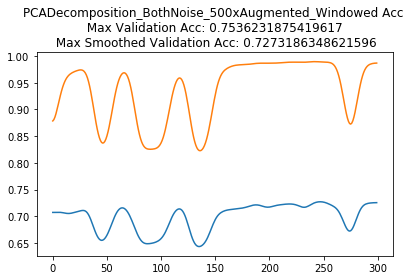

Max Validation Acc: 0.7028985619544983
Max Smoothed Validation Acc: 0.6671078756139958


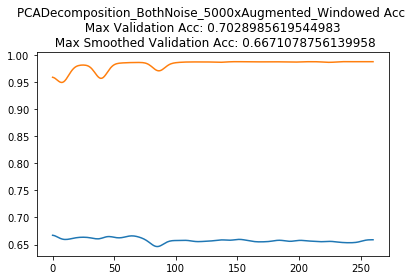

Max Validation Acc: 0.7572463750839233
Max Smoothed Validation Acc: 0.7433872348391876


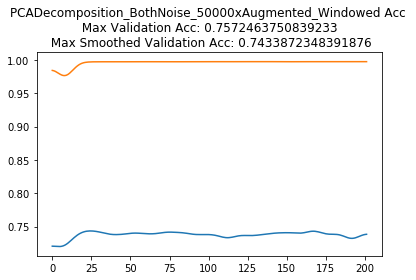

Max Validation Acc: 0.7028985619544983
Max Smoothed Validation Acc: 0.6847592320502723


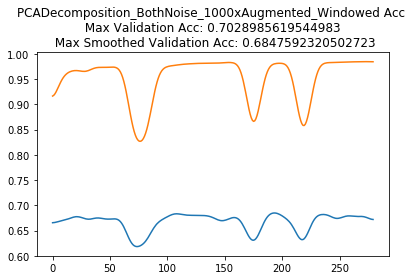

Max Validation Acc: 0.7137681245803833
Max Smoothed Validation Acc: 0.6906328982073726


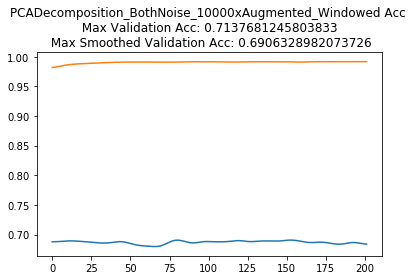

Max Validation Acc: 0.8224637508392334
Max Smoothed Validation Acc: 0.8033007230274652


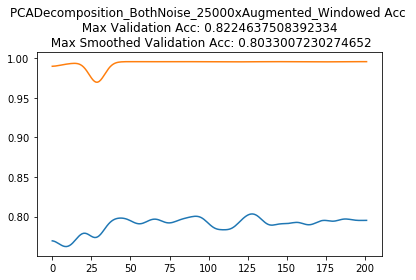

In [55]:
for sType in dResults.keys():
    fPlotTraining(dResults[sType], f'{sType}', sSaveLoc)

In [51]:
dResults[lsTypes[1]][0].history['acc']

[0.9414426897485313,
 0.9762630461765655,
 0.979126258428004,
 0.9776484714140574,
 0.9801422370000924,
 0.9768172162187124,
 0.9794957052695736,
 0.7563498662407074,
 0.5055878820143612,
 0.5852036573742195,
 0.9781102797072757,
 0.9801422370000924,
 0.9820818324558973,
 0.9785720884739401,
 0.9823589175210122,
 0.9797727903346887,
 0.9758935995111618,
 0.9834672578695552,
 0.9818971092553199,
 0.9819894708556086,
 0.978849173450972,
 0.9822665560088065,
 0.9769095777584441,
 0.9847603215067585,
 0.9835596195579269,
 0.9825436409858386,
 0.9831901728925232,
 0.9802345986884641,
 0.9795880670460283,
 0.9842985131529831,
 0.9827283643625819,
 0.9846679598183868,
 0.9855915766140205,
 0.9815276623256673,
 0.9848526831951302,
 0.9841137897762399,
 0.9850374065718734,
 0.9832825345808949,
 0.9840214280878682,
 0.9841137895395169,
 0.9844832364416435,
 0.9856839383023922,
 0.9828207260509536,
 0.9829130878274082,
 0.9846679597303039,
 0.9842985128281772,
 0.9847603215067585,
 0.982451279209

In [46]:
fPlotTraining(dResults[lsTypes[1]], f'{lsTypes[1]}', sSaveLoc)


0

In [16]:
dOrig={}
for iCV in range(3):
    sPath=f'/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/Original_trial3/Dense_08connectivitybasc122ModelHistoryCrossVal{iCV+1}.p'
    dOrig[iCV]=pkl.load(open(sPath,'rb'))

In [17]:
dOrig[0].history

{'val_loss': [7.322493076324463,
  1.1592755317687988,
  8.202132225036621,
  2.227294683456421,
  1.1834397315979004,
  1.1637121438980103,
  1.1657463312149048,
  1.1682109832763672,
  1.171319842338562,
  1.1746397018432617,
  1.176416039466858,
  1.1777946949005127,
  1.1760709285736084,
  1.173946499824524,
  1.170520305633545,
  1.1650965213775635,
  1.1600666046142578,
  1.1538598537445068,
  1.1462351083755493,
  1.1402249336242676,
  1.1317225694656372,
  1.1239043474197388,
  1.1166738271713257,
  1.1088367700576782,
  1.1019163131713867,
  1.094038724899292,
  1.0859869718551636,
  1.078148365020752,
  1.0707002878189087,
  1.0650886297225952,
  1.0581907033920288,
  1.0521639585494995,
  1.046279788017273,
  1.0405710935592651,
  1.0349169969558716,
  1.0305169820785522,
  1.0254898071289062,
  1.0204819440841675,
  1.0168439149856567,
  1.0132428407669067,
  1.0101094245910645,
  1.005160927772522,
  1.0025146007537842,
  1.001099944114685,
  0.9971833825111389,
  0.995052

Max Validation Acc: 0.6721311211585999
Max Smoothed Validation Acc: 0.6620343230326226


FileNotFoundError: [Errno 2] No such file or directory: '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/Images/DL_Aug_Comparison_Windowed/Original_trial3.png'

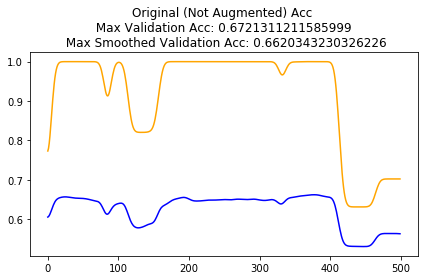

In [18]:
aValAcc0=np.array(dOrig[0].history['val_acc'])
aValAcc1=np.array(dOrig[1].history['val_acc'])
aValAcc2=np.array(dOrig[2].history['val_acc'])
aMeanValAcc=(aValAcc0+aValAcc2+aValAcc2)/3.0

aAcc0=np.array(dOrig[0].history['acc'])
aAcc1=np.array(dOrig[1].history['acc'])
aAcc2=np.array(dOrig[2].history['acc'])
aMeanAcc=(aAcc0+aAcc2+aAcc2)/3.0
    
# plt.plot(range(len(aValAcc0)), fSmooth(aValAcc0), 'orange')
# plt.plot(range(len(aValAcc1)), fSmooth(aValAcc1), 'orange')
# plt.plot(range(len(aValAcc2)), fSmooth(aValAcc2), 'orange')
plt.plot(range(len(aMeanValAcc)), fSmooth(aMeanValAcc), 'blue')
# plt.plot(range(len(aAcc0)), fSmooth(aAcc0), 'blue')
# plt.plot(range(len(aAcc1)), fSmooth(aAcc1), 'blue')
# plt.plot(range(len(aAcc2)), fSmooth(aAcc2), 'blue')
plt.plot(range(len(aMeanAcc)), fSmooth(aMeanAcc), 'orange')

print(f'Max Validation Acc: {np.max(aMeanValAcc)}')
print(f'Max Smoothed Validation Acc: {np.max(fSmooth(aMeanValAcc))}')


plt.title(f'Original (Not Augmented) Acc \n Max Validation Acc: {np.max(aMeanValAcc)} \n Max Smoothed Validation Acc: {np.max(fSmooth(aMeanValAcc))}')
plt.tight_layout()
plt.savefig(f'{sSaveLoc}/Original_trial3.png')

In [19]:
pdViolinPlotData=pd.DataFrame(columns=['Additional Samples', 'Decomp Method', 'Noise', 'Cross Val Fold', 'Tr/Val', 'Max Acc', 'Min Loss', 'Max smoothed Acc', 'Min smoothed Loss'])
pdViolinPlotData

,Additional Samples,Decomp Method,Noise,Cross Val Fold,Tr/Val,Max Acc,Min Loss,Max smoothed Acc,Min smoothed Loss


In [20]:
pdViolinPlotData.loc[0]=[0,'N/A', 'N/A', 0, 'Tr', np.max(np.array(dOrig[0].history['acc'])), np.min(np.array(dOrig[0].history['loss'])), np.max(fSmooth(np.array(dOrig[0].history['acc']))), fSmooth(np.min(np.array(dOrig[0].history['loss'])))]
pdViolinPlotData.loc[1]=[0,'N/A', 'N/A', 1, 'Tr', np.max(np.array(dOrig[1].history['acc'])), np.min(np.array(dOrig[1].history['loss'])), np.max(fSmooth(np.array(dOrig[1].history['acc']))), fSmooth(np.min(np.array(dOrig[1].history['loss'])))]
pdViolinPlotData.loc[2]=[0,'N/A', 'N/A', 2, 'Tr', np.max(np.array(dOrig[2].history['acc'])), np.min(np.array(dOrig[2].history['loss'])), np.max(fSmooth(np.array(dOrig[2].history['acc']))), fSmooth(np.min(np.array(dOrig[2].history['loss'])))]
pdViolinPlotData.loc[3]=[0,'N/A', 'N/A', 0, 'Val', np.max(np.array(dOrig[0].history['val_acc'])), np.min(np.array(dOrig[0].history['val_loss'])), np.max(fSmooth(np.array(dOrig[0].history['val_acc']))), fSmooth(np.min(np.array(dOrig[0].history['val_loss'])))]
pdViolinPlotData.loc[4]=[0,'N/A', 'N/A', 1, 'Val', np.max(np.array(dOrig[1].history['val_acc'])), np.min(np.array(dOrig[1].history['val_loss'])), np.max(fSmooth(np.array(dOrig[1].history['val_acc']))), fSmooth(np.min(np.array(dOrig[1].history['val_loss'])))]
pdViolinPlotData.loc[5]=[0,'N/A', 'N/A', 2, 'Val', np.max(np.array(dOrig[2].history['val_acc'])), np.min(np.array(dOrig[2].history['val_loss'])), np.max(fSmooth(np.array(dOrig[2].history['val_acc']))), fSmooth(np.min(np.array(dOrig[2].history['val_loss'])))]

In [ ]:
pdViolinPlotData